In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
exp = np.random.exponential(1, 500)

(array([249., 106.,  66.,  40.,  17.,  10.,   4.,   4.,   1.,   3.]),
 array([3.34985150e-03, 6.41200797e-01, 1.27905174e+00, 1.91690269e+00,
        2.55475363e+00, 3.19260458e+00, 3.83045553e+00, 4.46830647e+00,
        5.10615742e+00, 5.74400836e+00, 6.38185931e+00]),
 <BarContainer object of 10 artists>)

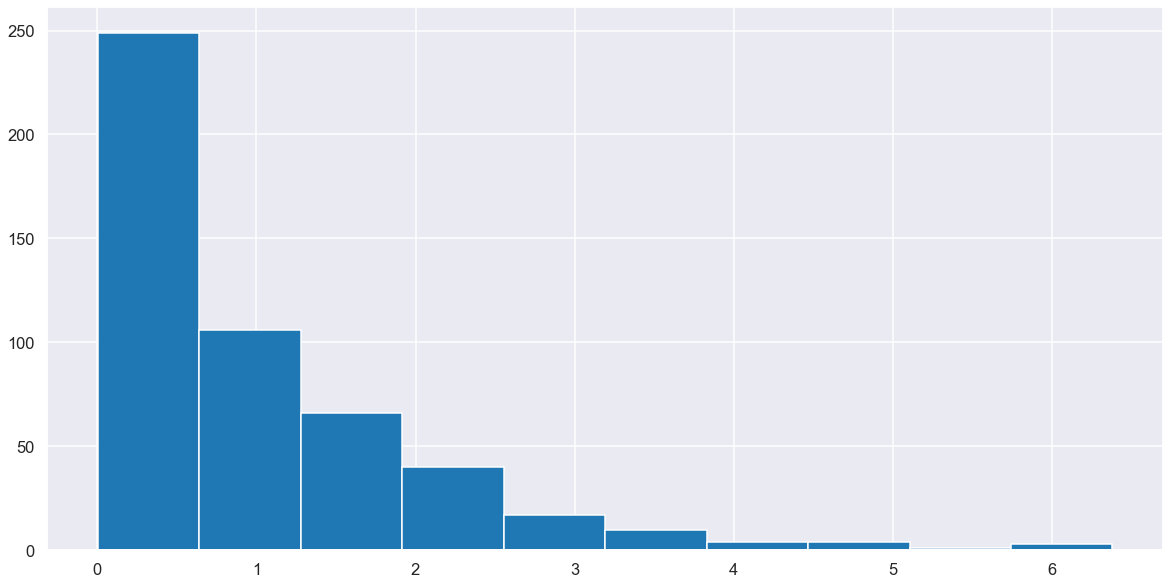

In [4]:
plt.hist(exp)

In [5]:
dists = [
    (np.random.exponential(0.5, 500), 0.5),
    (np.random.exponential(1.5, 500), 1.5),
    (np.random.exponential(2, 500), 2),
]

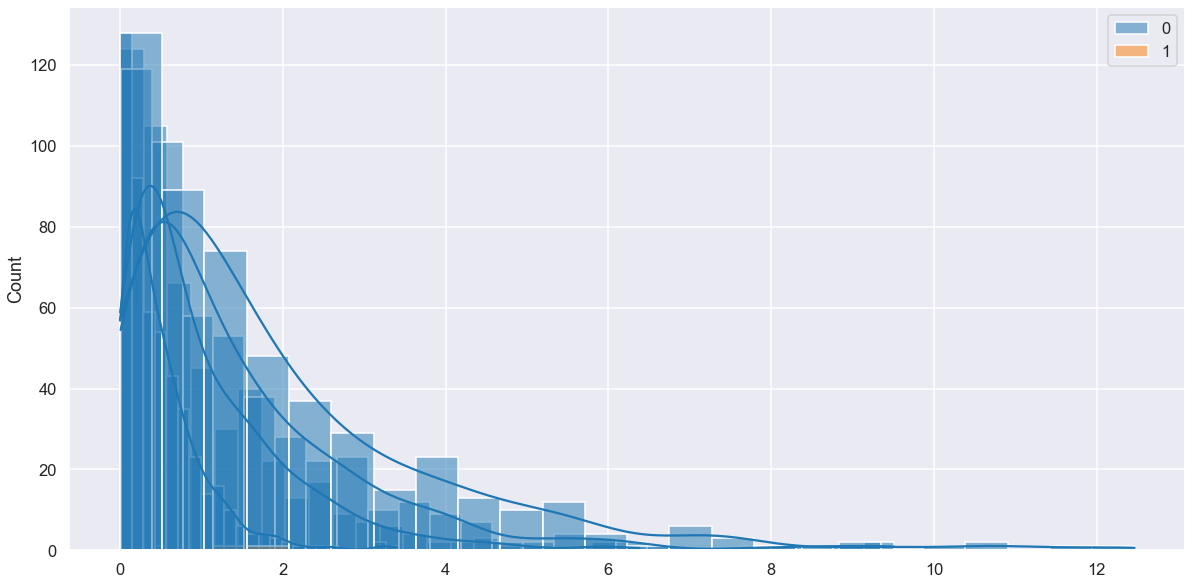

In [6]:
sns.histplot(exp, kde=True)
for _ in dists:
    sns.histplot(_, kde=True, )

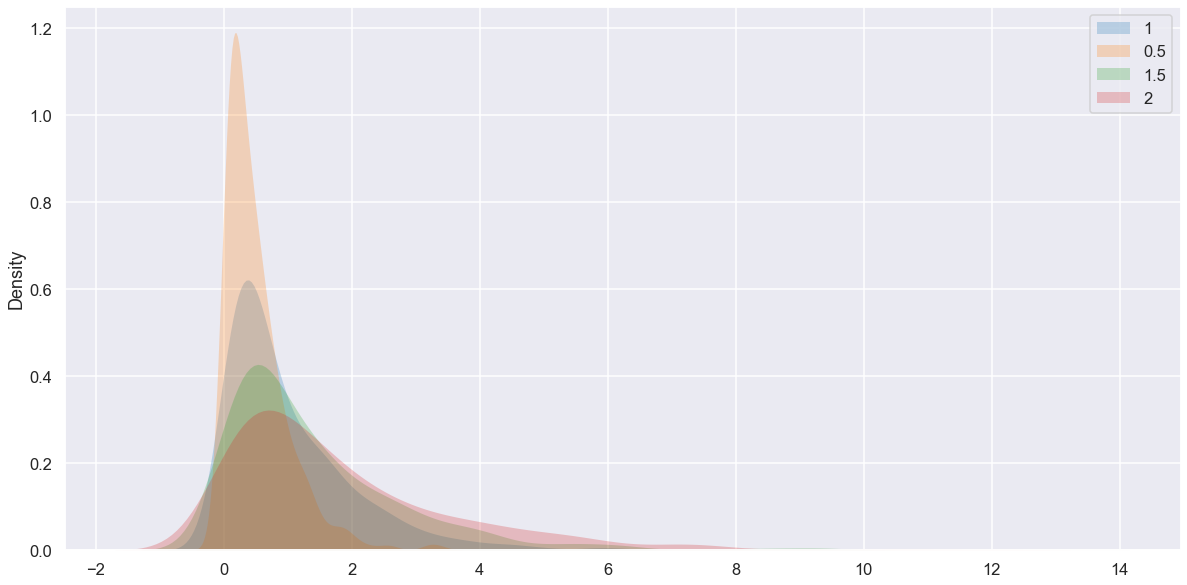

In [7]:
sns.kdeplot(exp, label=1, fill=True, linewidth=0)
for _ in dists:
    sns.kdeplot(_[0], label=_[1], fill=True, linewidth=0)

_ = plt.legend()

In [8]:
beta_new = np.mean(exp)

In [9]:
beta_new

1.0145212767866238

In [10]:
mle = np.random.exponential(beta_new, 500)

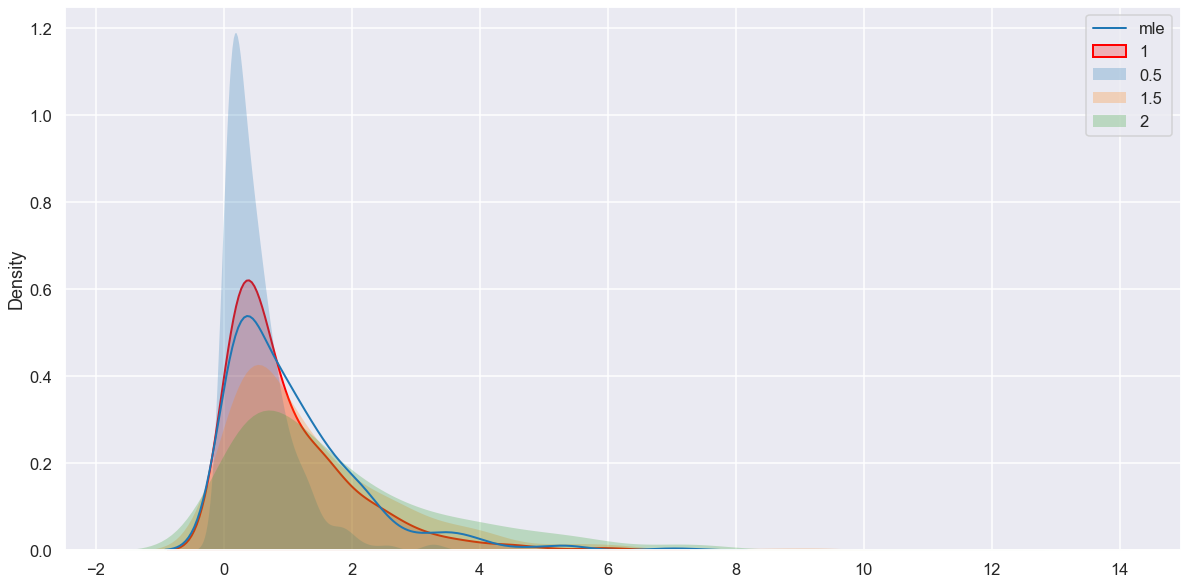

In [11]:
sns.kdeplot(exp, label=1, fill=True, linewidth=2, color='red')
for _ in dists:
    sns.kdeplot(_[0], label=_[1], fill=True, linewidth=0)
sns.kdeplot(mle, label="mle", fill=False, linewidth=2)

_ = plt.legend()

In [12]:
def likelihood(lamb, X):
    return lamb ** len(X) * np.exp(-1 * lamb * np.sum(X))

In [13]:
def loglikelihood(lamb, X):
    return len(X) * np.log(lamb) + np.log(np.exp(-1 * lamb * np.sum(X)))

In [14]:
likelihoods = [likelihood(l, exp) for l in np.arange(0.05, 3, 0.05)]

In [15]:
loglikelihoods = [loglikelihood(l, exp) for l in np.arange(0.05, 3, 0.05)]

<ipython-input-13-d3f5a1d18de4>:2: RuntimeWarning: divide by zero encountered in log
  return len(X) * np.log(lamb) + np.log(np.exp(-1 * lamb * np.sum(X)))


In [16]:
likelihoods

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.488843476372682e-306,
 8.124510562037005e-288,
 2.9582414927235467e-273,
 2.161494314596213e-261,
 1.0377001263343598e-251,
 7.858280146059923e-244,
 1.8253906842926049e-237,
 2.1810855900398553e-232,
 2.019573159220543e-228,
 2.0164923707370555e-225,
 2.8447305539659897e-223,
 7.092644504658531e-222,
 3.7699128491730814e-221,
 5.006150008852658e-221,
 1.901641239226931e-221,
 2.3216504049199566e-222,
 1.007742592991847e-223,
 1.698351795432216e-225,
 1.200566795798404e-227,
 3.8109317424715545e-230,
 5.770513444889856e-233,
 4.398688844211704e-236,
 1.7713595552624997e-239,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [17]:
likelihoods.index(max(likelihoods))

19

In [18]:
np.arange(0, 3, 0.05)[21]

1.05

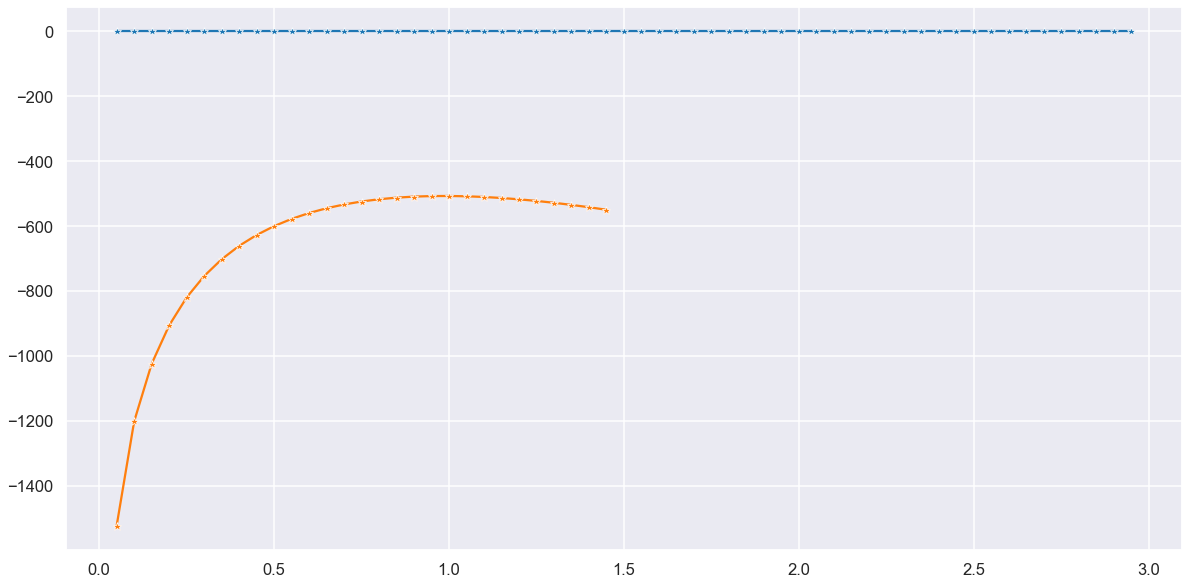

In [19]:
_ = sns.lineplot(x=np.arange(0.05, 3, 0.05), y=likelihoods, marker='*')
_ = sns.lineplot(x=np.arange(0.05, 3, 0.05), y=loglikelihoods, marker='*')